# Example: Let's Benchmark our Previous Bubble Sort Implementation
This example will familiarize students with using benchmarking tools to profile their code's time- and space complexity. Make it run correctly first, then make it run fast! We'll use our previous bubble sort implementation since we know it is correct. Let's get started!

## Setup
We set up the computational environment by including [the `Include. jl` file](Include.jl) using [the `include(...)` method](https://docs.julialang.org/en/v1/base/base/#Base.include). The [`Include.jl` file](Include.jl) loads external packages and functions we will use in these examples. 
* For additional information on functions and types used in this example, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/). 

In [3]:
include("Include.jl");

## Task 1: Let's benchmark bubble sort
We know [bubble sort](https://en.wikipedia.org/wiki/Bubble_sort) is a slow sorting algorithm, and we expect because of the nested for loops that it will run in $\mathcal{O}(n^{2})$ time complexity. Let's check out that claim using [tools for the BenchmarkTools.jl package](https://github.com/JuliaCI/BenchmarkTools.jl). 
* In the code block below, we generate random input vectors and sort them in `descending order,` i.e., the worst case for [bubble sort](https://en.wikipedia.org/wiki/Bubble_sort). We then use [the `@benchmark` macro](https://juliaci.github.io/BenchmarkTools.jl/dev/reference/#BenchmarkTools.@benchmark-Tuple) to compute the runtime of a call to our non-mutating [`bubble_sort(...)` implementation](src/Compute.jl).
* There are a couple of new things demonstrated below: we use [a progress meter for long-running calls exported by the ProgressMeter.jl package](https://github.com/timholy/ProgressMeter.jl), we use a [two-dimensional array](https://docs.julialang.org/en/v1/base/arrays/) to the store the results data, and we use an [array comprehension to compute the length of the random vectors](https://docs.julialang.org/en/v1/manual/arrays/#man-comprehensions).
* Finally, we have [the let block](https://docs.julialang.org/en/v1/manual/variables-and-scoping/#Let-Blocks), which creates a hard scope block, return a value.

In [5]:
results_array = let

    number_of_samples = 12;
    collection = [2^i for i ∈ 1:number_of_samples]; # This is a comprehension,

    push!(collection, 1500); # add out of sequence
    push!(collection, 2500); # add out of sequence
    push!(collection, 3000); # add out of sequence
    push!(collection, 3500); # add out of sequence
    collection |> sort! # put back in order
    
    results = Array{Any, 2}(undef, length(collection), 2);
    sounds = nothing;

    counter = 1;
    @showprogress dt=1 desc="Computing..." for i ∈ eachindex(collection)
        
        tmp_random_array = rand(1:collection[i] ,collection[i]) |> v->sort(v, rev=true) # hmmm. what is going on here?
        tvals = @benchmark bubble_sort($tmp_random_array; sounds = $sounds);
        
        results[counter, 1] = collection[i];
        results[counter, 2] = median(tvals.times);
        counter += 1;
    end
    results;
end;

Computing... 100%|███████████████████████████████████████| Time: 0:01:45


### Visualize
Now that we have the results array that holds the timing information for each length of random sequence, we can plot it [using functions exported by the Plots.jl package](https://github.com/JuliaPlots/Plots.jl).
* The [Plots.jl package](https://github.com/JuliaPlots/Plots.jl) has syntax very similar to [plots in Matlab](https://www.mathworks.com/help/matlab/ref/plot.html) and similar libraries in [Python such as Matplotlib](https://matplotlib.org/).

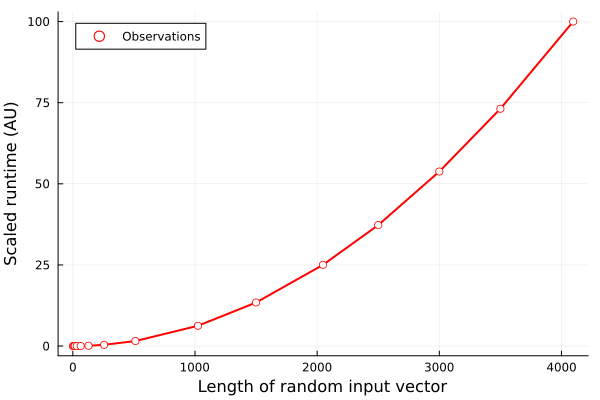

In [7]:
let

    scale_factor = maximum(results_array[:,2])
    N = results_array[:,1]
    X = (100/scale_factor)*results_array[:,2];
    
    plot(N,X, c=:red, lw=2, label="")
    scatter!(N,X, c=:white, msc=:red, label="Observations")

    xlabel!("Length of random input vector", fontsize = 18);
    ylabel!("Scaled runtime (AU)", fontsize = 18)
end

In [49]:
example_index = 2;
input = results_array[example_index,1]/results_array[example_index-1,1];
ouput = results_array[example_index,2]/results_array[example_index-1,2];
println("Input increase factor: $(input), time increase factor: $(ouput) for i = $(example_index)")

Input increase factor: 2.0, time increase factor: 1.2792844830946328 for i = 2
